# Image Transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

## Tải dữ liệu hình ảnh để demo

In [ ]:
# get data demo

#!wget -qO- https://cdn.discordapp.com/attachments/817270986423664670/843522898127880232/img.zip > img.zip

!mkdir -p img
%cd img

!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/843861900415991878/African_lion_1920x1080.jpg
!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/843861927800340510/Angkor_Cambodia_1920x1080.jpg
!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/843861933216104468/Baler_Philippines_1920x1080.jpg
!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/843861936210444288/Bardenas_Reales_Spain_1920x1080.jpg
!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/843861936113582131/Baltic_seashore_Germany_1920x1080.jpg
!curl -Os https://cdn.discordapp.com/attachments/817270986423664670/846572514792439818/Lenna_test_image.png
!curl -Os https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/220px-Flag_of_Vietnam.svg.png

%ls
%cd ..

/content/img
220px-Flag_of_Vietnam.svg.png    Baltic_seashore_Germany_1920x1080.jpg
African_lion_1920x1080.jpg       Bardenas_Reales_Spain_1920x1080.jpg
Angkor_Cambodia_1920x1080.jpg    Lenna_test_image.png
Baler_Philippines_1920x1080.jpg
/content


Lưu danh sách các tên file hình ảnh vào biến `list_image_name`.

In [ ]:
list_image_name = !ls -1 img/
list_image_name

['220px-Flag_of_Vietnam.svg.png',
 'African_lion_1920x1080.jpg',
 'Angkor_Cambodia_1920x1080.jpg',
 'Baler_Philippines_1920x1080.jpg',
 'Baltic_seashore_Germany_1920x1080.jpg',
 'Bardenas_Reales_Spain_1920x1080.jpg',
 'Lenna_test_image.png']

Hiển thị ảnh gốc.

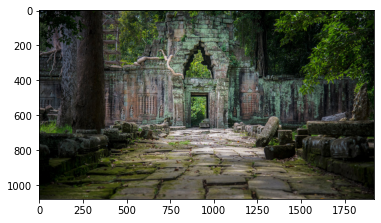

In [ ]:
img = PIL.Image.open(f'img/{list_image_name[2]}')
plt.imshow(img)

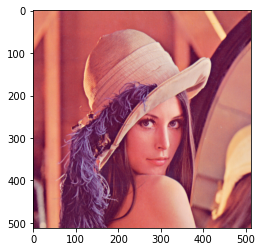

In [ ]:
test_img = PIL.Image.open(f'img/{list_image_name[-1]}')
plt.imshow(test_img)

## Thay đổi độ sáng

**Ý tưởng thực hiện:** đối với mỗi điểm ảnh, lấy giá trị độ sáng của mỗi màu (R, G, B) nhân trực tiếp với tỉ lệ `ratio` độ sáng, ratio này trong khoảng từ `[0..255]` và là số thực, bởi vì mỗi điểm ảnh đã được giới hạn trong khoảng `[0..255]` rồi.

Mô tả hàm chức năng:

```python
def change_brightness(img, ratio):
    """
    img: hình ảnh, có thể là mảng 2d hoặc image_pil
    ratio: tỉ lệ, số thực dương.

    return: PIL.Image
    """
```

In [ ]:
def change_brightness(img, ratio):
    if isinstance(img, np.ndarray):
        img = PIL.Image.fromarray(img.astype('uint8'))

    def brightness(c):
        value = c * ratio
        return max(0, min(255, value))
    return img.point(brightness)

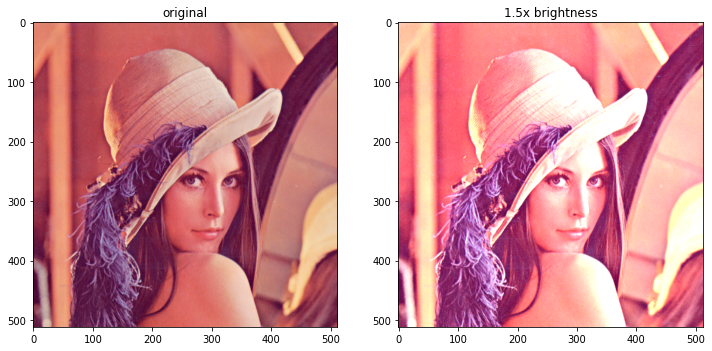

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(test_img)
ax[0].set_title('original')

plt.imshow(change_brightness(test_img, 1.5))
ax[1].set_title('1.5x brightness');
#plt.savefig('brightness1.png');

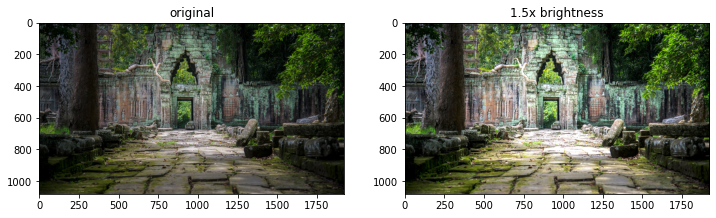

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(img)
ax[0].set_title('original')

plt.imshow(change_brightness(img, 1.5))
ax[1].set_title('1.5x brightness');
#plt.savefig('brightness2.png');

## Thay đổi độ tương phản

**Ý tưởng thực hiện:** đối với mỗi điểm ảnh, tính toán lại giá trị của mỗi điểm ảnh theo ý tưởng sau:

- Các điểm ảnh bé hơn `128` sẽ **trừ đi** một giá trị bằng `ratio * khoảng cách tới điểm ảnh đó`.

- Ngược lại, các điểm ảnh lớn hơn `128` sẽ **cộng thêm** một giá trị bằng `ratio * khoảng cách tới điểm ảnh đó`.

Lý do cho sự lựa chọn trên chính là ta muốn độ tương phản càng cao thì sự khác biệt giữa các dải màu sáng tối là sẽ rõ rệt hơn, `ratio` càng cao thì giá trị cộng thêm hay trừ đi càng lớn. 

Mô tả hàm chức năng:

```python
def change_contrast(img, ratio):
    """
    img: hình ảnh, có thể là mảng 2d hoặc image_pil
    ratio: tỉ lệ, số thực dương.

    return: PIL.Image
    """
```

In [ ]:
def change_contrast(img, ratio):
    if isinstance(img, np.ndarray):
        img = PIL.Image.fromarray(img.astype('uint8'))

    def contrast(c):
        value = 128 + ratio * (c - 128)
        return max(0, min(255, value))
    return img.point(contrast)

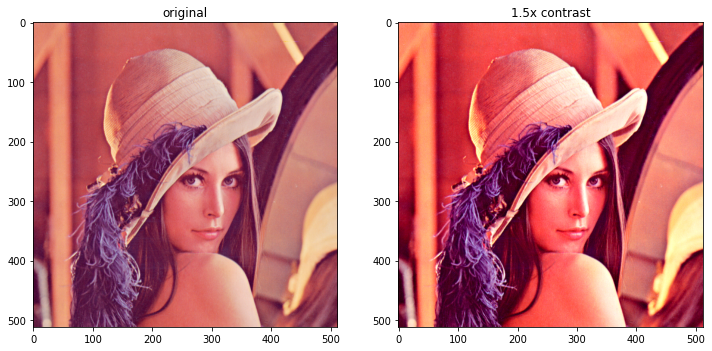

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(test_img)
ax[0].set_title('original')

plt.imshow(change_contrast(test_img, 1.5))
ax[1].set_title('1.5x contrast');

#plt.savefig('contrast1.png');

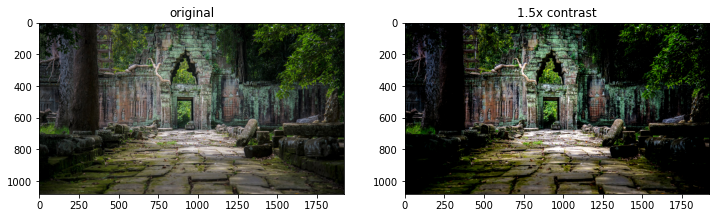

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(img)
ax[0].set_title('original')

plt.imshow(change_contrast(img, 1.5))
ax[1].set_title('1.5x contrast');
#plt.savefig('contrast2.png');

## Đổi ảnh RGB thành ảnh xám

[Weighted method](https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm)

**Ý tưởng thực hiện:** ảnh xám chỉ có một giá trị mỗi điểm ảnh (một kênh màu) (thay vì 3 kênh gồm R-G-B như ảnh màu). vậy với mỗi điểm ảnh, ta tính lại giá trị màu `xám` dựa vào 3 giá trị của R-G-B theo phương pháp `Weighted method`, cụ thể:

$$ new\_pixel = 0.3 R + 0.59 G + 0.11 B $$ 

Lý giải cho việc này, màu xanh lá cây `Green` khiến mắt dễ nhìn hơn, trong khi đó màu đỏ `Red` lại có giá trị bước sóng của cả 3 màu, còn màu xanh biển `Blue`
đóng góp ít nhất cho ảnh xám.

Mô tả hàm chức năng:

```python
def to_grayscale(img):
    """
    img: hình ảnh, có thể là mảng 2d hoặc image_pil
    
    return: numpy.ndarray
    """
```

In [ ]:
def to_grayscale(img):
    distributions = np.array([.3, .59, .11]) # distributions of R, G, B

    np_arr = np.array(img)

    (w, h, chanels) = np_arr.shape

    gr_img_1d = np.array([distributions @ px for px in np_arr.reshape(w*h, chanels)]).astype('int')

    return gr_img_1d.reshape(w, h)

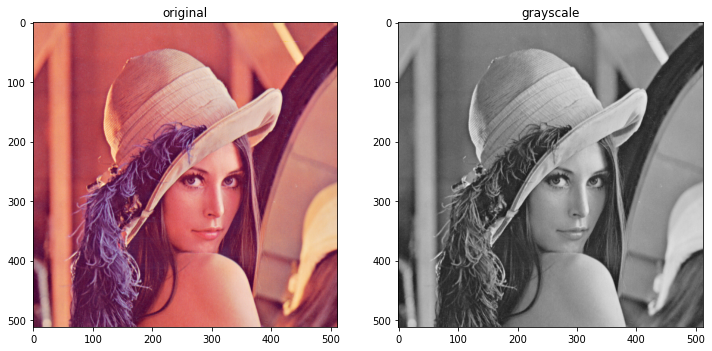

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(test_img)
ax[0].set_title('original')

plt.imshow(to_grayscale(test_img), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grayscale');

#plt.savefig('gray1.png');

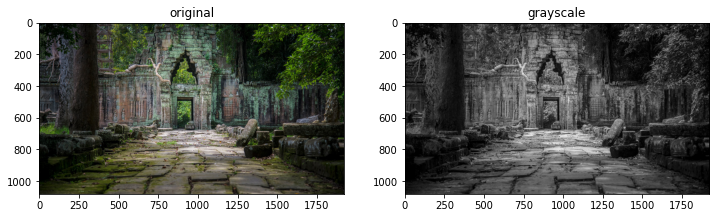

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(img)
ax[0].set_title('original')

plt.imshow(to_grayscale(img), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grayscale');

#plt.savefig('gray2.png');

## Lật ảnh (ngang - dọc)

**Ý tưởng thực hiện:** Ảnh là ảnh 2D, nếu lật ngang thì ta chỉ cần đảo ngược theo từng dòng, lật dọc thì đảo ngược theo từng cột.

Mô tả hàm chức năng:

```python
def flip(img, orientation='horizontal'):
    """
    img: hình ảnh, có thể là mảng 2d hoặc image_pil
    orientation: Hướng lật: 'horizontal' là ngang, 
                            'vertical' là dọc.
    
    return: numpy.ndarray
    """
```

In [ ]:
def flip(img, orientation='horizontal'):
    np_arr = np.array(img)
    (w, h, chanels) = np_arr.shape
    result = None

    if orientation == 'horizontal':
        result = np.fliplr(np_arr)
    elif orientation == 'vertical':
        result = np.flipud(np_arr)
    else:
        raise Exception("Orientation must be 'horizontal' or 'vertical'.")
        
    return result

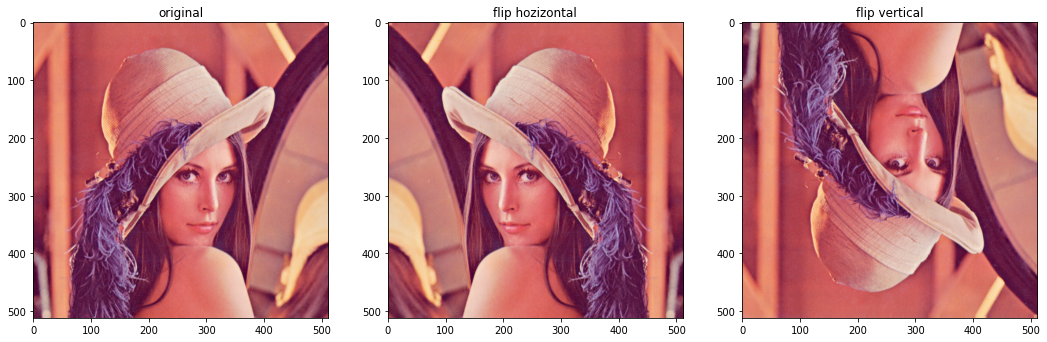

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(18,6))

ax[0].imshow(test_img)
ax[0].set_title('original')

ax[1].imshow(flip(test_img, orientation='horizontal'))
ax[1].set_title('flip hozizontal')

ax[2].imshow(flip(test_img, orientation='vertical'))
ax[2].set_title('flip vertical');
#plt.savefig('flip1.png');

## Chồng 2 ảnh cùng kích thước (chỉ làm trên ảnh xám)

**Ý tưởng thực hiện:** Khi chồng 2 ảnh vào nhau, ta giả sử 1 ảnh là nền `background`, ảnh còn lại là chi tiết chính `foreground`. Ảnh nền sẽ được xử lý giảm độ sáng xuống một chút (80%), sau đó lấy trung bình cộng 2 điểm ảnh tương ứng của 2 ảnh để cho ra kết quả.

Mô tả hàm chức năng:

```python
def layer_overlay(src_img, new_img):
    """
    src_img: ảnh background, có thể là mảng 2d hoặc image_pil
    new_img: ảnh foreground, có thể là mảng 2d hoặc image_pil
    
    return: numpy.ndarray
    """
```

In [ ]:
def layer_overlay(src_img, new_img):
    np_src = np.array(src_img)
    np_new = np.array(new_img)

    (h1, w1, c1) = np_src.shape
    (h2, w2, c2) = np_new.shape
    
    if (h1 != h2) or (w1 != w2):
        raise Exception("There are not the same images size!")
    
    # decrease brightness of background
    np_src = change_brightness(np_src, 0.8)

    if c1 > 1: 
        np_src = to_grayscale(np_src)
        
    if c2 > 1: 
        np_new = to_grayscale(np_new)
        
    src_1d = np_src.reshape(h1 * w1)
    new_1d = np_new.reshape(h2 * w2)
    
    def combine(src, new):
        return int((src + new) / 2)
    
    res = np.array([combine(src_1d[i], new_1d[i]) for i in range(h1*w1)]).reshape(h1, w1)

    return res

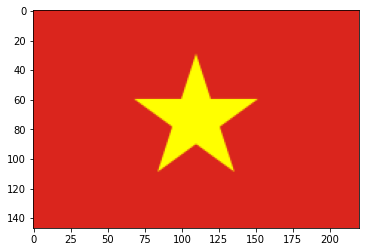

In [ ]:
flag_img = PIL.Image.open(f'img/{list_image_name[0]}').convert('RGB')
plt.imshow(flag_img)

In [ ]:
demo_flag = np.array(flag_img)

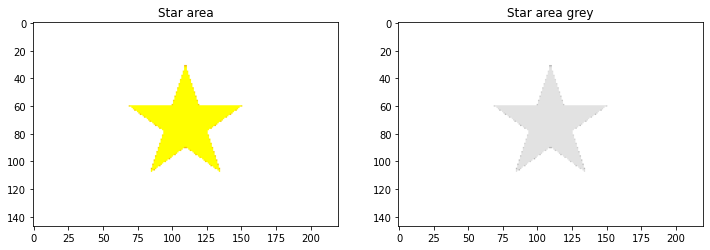

In [ ]:
(w,h,c) = demo_flag.shape

star_area = np.array([t if t[2] < 10 else [255,255,255] for t in demo_flag.reshape(w*h, 3)]).reshape(w,h,c)

f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(star_area)
ax[0].set_title('Star area')

ax[1].imshow(to_grayscale(star_area), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Star area grey');

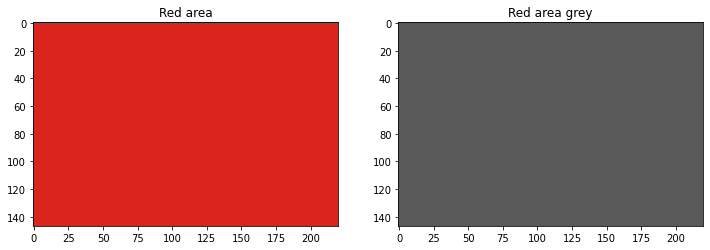

In [ ]:
red_color = demo_flag[0,0]
red_area = np.array([red_color for _ in demo_flag.reshape(w*h, 3)]).reshape(w,h,c)

f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(red_area)
ax[0].set_title('Red area')

ax[1].imshow(to_grayscale(red_area), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Red area grey');

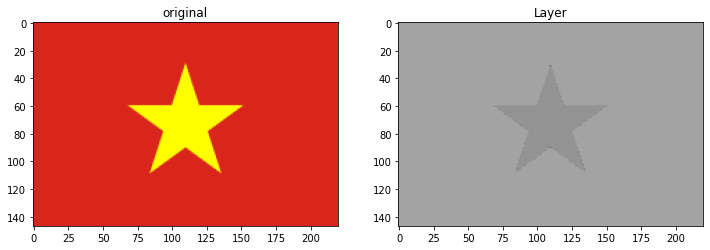

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(demo_flag)
ax[0].set_title('original')

ax[1].imshow(layer_overlay(red_area, star_area), cmap='gray', vmin=0, vmax=255);
ax[1].set_title('Layer');

#plt.savefig('layer1.png');

## Làm mờ ảnh

[Kernel_(image_processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

**Ý tưởng thực hiện:** Đối với mỗi điểm ảnh, hòa trộn các điểm ảnh lân cận vào nó để làm cho các điểm ảnh gần nhau sẽ có giá trị tương tự nhau, dẫn đến chúng bị mờ.

Cụ thểthể: Gaussian_blur3x3 sử dụng một kernel3x3 để nhân với một vùng lân cận quanh pixel(x, y) của hình gốc sau đó lấy tổng để tính toán được pixel mới.

Tương tự với Gaussian_blur5x5.

Mô tả hàm chức năng:

```python
def gaussian_blur3x3(img):
    """
    img: ảnh background, có thể là mảng 2d hoặc image_pil
    
    return: numpy.ndarray
    """
```

In [ ]:
def gaussian_blur3x3(img):
    img = np.array(img)

    kernel3x3 = np.array([
                      [-1,-1,-1],
                      [-1,5,-1],
                      [-1-1,0]
    ]) / 16
    
    img = np.array(img)
    res = img.copy()

    w,h,c = img.shape
    x = y = 0
    ds = [-1, 0, 1]

    for x in range(w):
        for y in range(h):
            for chanel in range(c):
                f = np.zeros(9).reshape((3,3))

                for dx in ds:
                    for dy in ds:
                        f[dx+1, dy+1] = img[x+dx, y+dy][chanel] if (x + dx >= 0) and (x + dx < w) and (y + dy >= 0) and (y + dy < h) else c
                            
                res[x, y, chanel] = np.sum((f * kernel3x3))

    return res

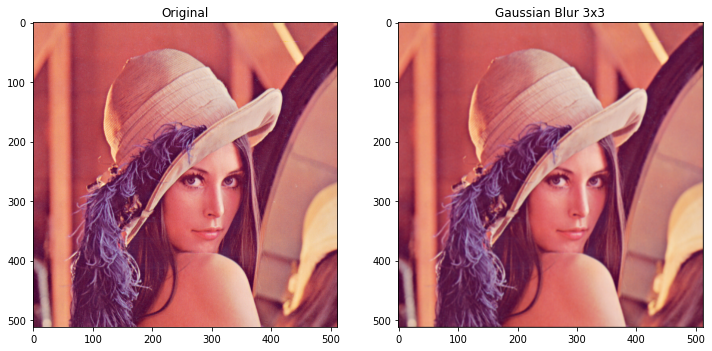

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(test_img)
ax[0].set_title('Original')

ax[1].imshow(gaussian_blur3x3(test_img), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Blur 3x3');

#plt.savefig('gauss1.png');

In [ ]:
def gaussian_blur5x5(img):
    img = np.array(img)

    kernel5x5 = np.array([
                      [1,4,6,4,1],
                      [4,16,24,16,4],
                      [6,24,36,24,6],
                      [4,16,24,16,4],
                      [1,4,6,4,1]
    ]) / 256
    
    img = np.array(img)
    res = img.copy()

    w,h,c = img.shape
    x = y = 0
    ds = [-2, -1, 0, 1, 2]

    for x in range(w):
        for y in range(h):
            for chanel in range(c):
                f = np.zeros(25).reshape((5,5))

                for dx in ds:
                    for dy in ds:
                        f[dx+1, dy+1] = img[x+dx, y+dy][chanel] if (x + dx >= 0) and (x + dx < w) and (y + dy >= 0) and (y + dy < h) else c
                            
                res[x, y, chanel] = np.sum((f * kernel5x5))

    return res

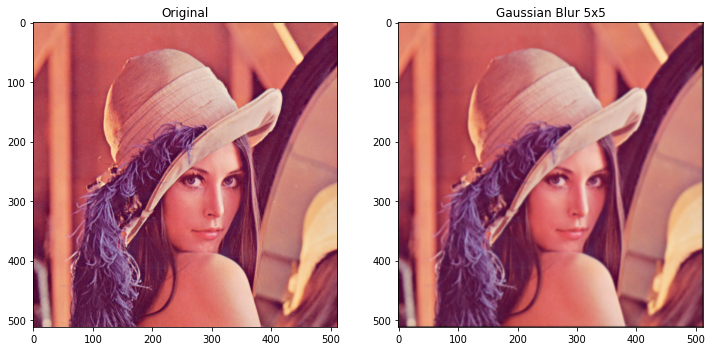

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].imshow(test_img)
ax[0].set_title('Original')

ax[1].imshow(gaussian_blur5x5(test_img), cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Blur 5x5');

#plt.savefig('gauss5x5.png');